# Principal Component Analysis (PCA)

# Principal Component Analysis (PCA)

### Principal Component Analysis (PCA) is a powerful dimensionality reduction technique used to simplify complex, high-dimensional datasets.
### In today's world, datasets often contain a large number of features, making both data visualization and machine learning model training challenging and time-consuming.

### This project explores how PCA can be used for:

* Data Visualization: By reducing data dimensions to 2 or 3, we can easily observe hidden structures and patterns within the data.
* Speeding Up Machine Learning Algorithms: By reducing the number of input features without losing essential information, the training and testing time of machine learning models can be significantly decreased.

### Importing Necessary Libraries

### %matplotlib inline for displaying plots directly in Jupyter Notebook (if applicable)

## Importing the libraries

In [ ]:
# %matplotlib inline for displaying plots directly in Jupyter Notebook (if applicable)
import numpy as np # برای عملیات عددی و آرایه‌ها (for numerical operations and arrays)
import pandas as pd # برای کار با دیتافریم‌ها و تحلیل داده (for working with DataFrames and data analysis)
import matplotlib.pyplot as plt # برای رسم نمودارها (for plotting charts)
import seaborn as sns # برای بصری‌سازی داده‌ها به شکلی جذاب‌تر (for more attractive data visualization)
from sklearn.decomposition import PCA # PCA class from Scikit-learn for performing Principal Component Analysis
from sklearn.preprocessing import StandardScaler # برای مقیاس‌بندی ویژگی‌ها (استانداردسازی) (for feature scaling - standardization)


## Importing the dataset

In [ ]:
# Load the Iris dataset from a CSV file.
# Ensure that 'iris.csv' file is located in the same directory as this notebook.
df = pd.read_csv('iris.csv')
X = df.iloc[:,0:4].values
# Labels (column 4) represent the Iris flower species.
y = df.iloc[:,4].values

In [ ]:
# Display the first 5 rows of the DataFrame for initial inspection.
print("Sample of the original data:")
print(df.head())

## Feature Scaling

In [ ]:
# Feature scaling is a crucial step before applying PCA.
# PCA is sensitive to feature variances, so features with larger values might have a disproportionately larger impact.
# StandardScaler transforms the data to have a mean of zero and a unit variance.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print("Sample of the scaled data:")
print(X_scaled[:5])

<img src="https://miro.medium.com/max/875/1*Qxyo-uDrmsUzdxIe7Nnsmg.png" width=80% />

## Applying PCA

In [ ]:
# Define the PCA model with 2 principal components.
# Our goal is to reduce dimensionality from 4 to 2 for visualization purposes.
pca_df = PCA(n_components = 2)
# Apply PCA to the scaled data.
# fit_transform both trains the model and transforms the data.
X = pca_df.fit_transform(X)

In [ ]:
# Create a new DataFrame from the principal components.
maindf = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])

In [19]:
maindf

,principal component 1,principal component 2
0,-2.501021,0.451868
1,-2.279945,-0.696698
2,-2.559435,-0.383488
3,-2.476060,-0.636243
4,-2.579407,0.611050
...,...,...
145,1.953963,0.391855
146,1.982991,-0.866112
147,1.854045,0.290264
148,1.478182,0.982267


In [20]:
pca_df.components_

array([[ 0.55318314,  0.51774664, -0.28847469,  0.58541369],
       [ 0.00902118,  0.42093567,  0.90471285,  0.06501105]])

<img src="https://miro.medium.com/max/875/1*7jUCr36YguAMKNHTN4Gt8A.png" width=80% />

In [21]:
pca_df.explained_variance_

array([2.83122907, 0.92107083])

In [22]:
finaldf = pd.concat([maindf, df[['Species']]], axis = 1)
finaldf

,principal component 1,principal component 2,Species
0,-2.501021,0.451868,Iris-setosa
1,-2.279945,-0.696698,Iris-setosa
2,-2.559435,-0.383488,Iris-setosa
3,-2.476060,-0.636243,Iris-setosa
4,-2.579407,0.611050,Iris-setosa
...,...,...,...
145,1.953963,0.391855,Iris-virginica
146,1.982991,-0.866112,Iris-virginica
147,1.854045,0.290264,Iris-virginica
148,1.478182,0.982267,Iris-virginica


## Visualising the results

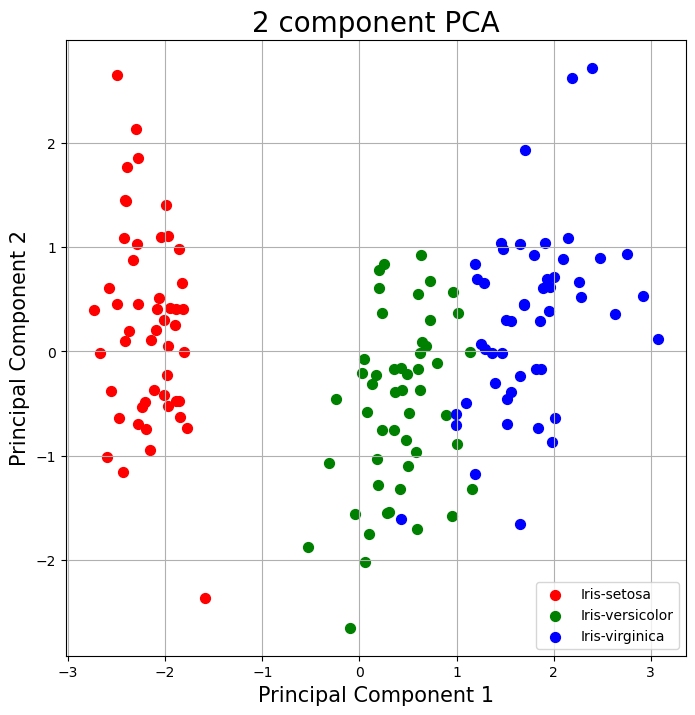

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Species'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()